In [2]:
import pandas as pd
import pytrends
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
from pytrends.request import TrendReq

In [4]:
pytrends = TrendReq(hl='en-US', tz=360)

In [5]:
kw_list =["ESG"]
pytrends.build_payload(kw_list, geo ='GR')

In [6]:
df=pytrends.interest_over_time()

In [7]:
df.to_csv("greekGoogleTrendEsg.csv",sep=';')
df.head()
df['ESG'].dtype

dtype('int64')

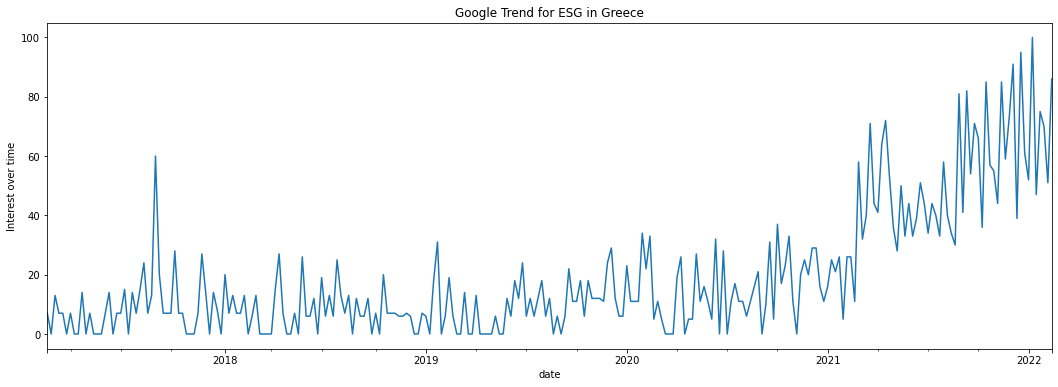

In [18]:
title='Google Trend for ESG in Greece'
ylabel='Interest over time'
ax=df['ESG'].plot(figsize=(18,6),title=title)
ax.set(ylabel=ylabel);

## ETS Decompositon model

<AxesSubplot:title={'center':'Trend'}, xlabel='date'>

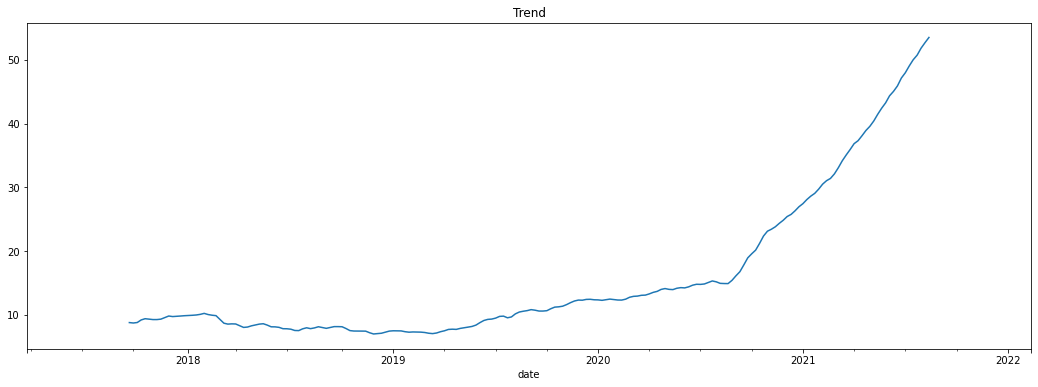

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize']=18,6

df.dropna(inplace=True)
result=seasonal_decompose(df['ESG'],model='additive')
result.trend.plot(title = "Trend")

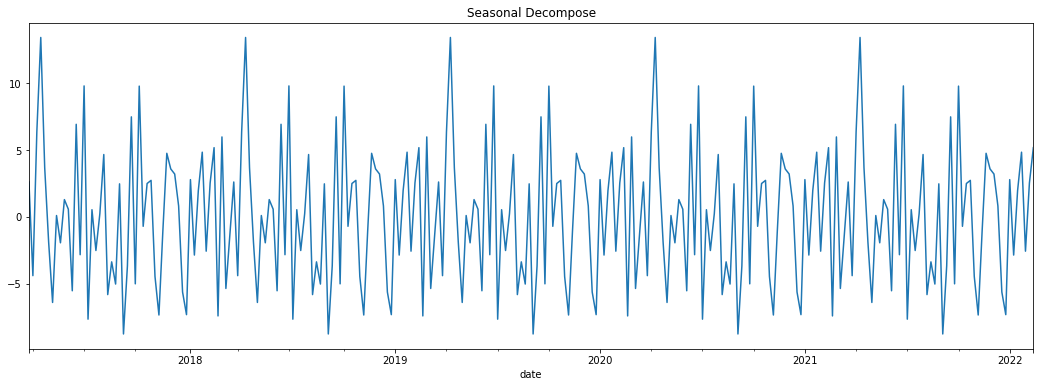

In [50]:
result.seasonal.plot(title="Seasonal Decompose", figsize=(18,6));

## 6-Month Simple Moving Average(SMA)

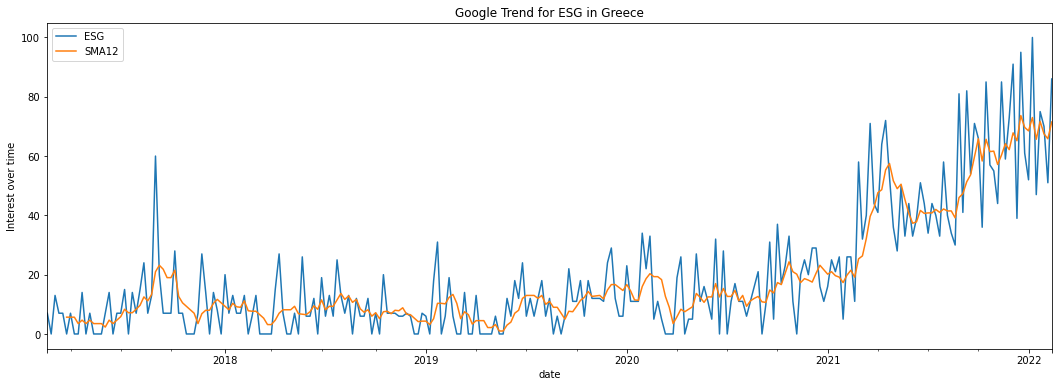

In [17]:
# 12months Simple Moving Average
df['SMA12']=df['ESG'].rolling(window=6).mean()
df[['ESG','SMA12']].plot(figsize=(18,6), title = title).set(ylabel = ylabel);